In [3]:
import pandas as pd
import numpy as np

import os
import sys
import tensorflow as tf
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization,LSTM
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
tess_directory_list = os.listdir('tess')

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir('tess\\'+dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            if part=='disgust' or part=='fear':
                file_emotion.append('sad')
            else:
                file_emotion.append(part)
        file_path.append('tess\\' + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
Tess_df.Emotions.value_counts()

sad         1200
angry        400
happy        400
neutral      400
surprise     400
Name: Emotions, dtype: int64

In [5]:
SAVEE = "savee\ALL"
dir_list = os.listdir(SAVEE)
dir_list

['DC_a01.wav',
 'DC_a02.wav',
 'DC_a03.wav',
 'DC_a04.wav',
 'DC_a05.wav',
 'DC_a06.wav',
 'DC_a07.wav',
 'DC_a08.wav',
 'DC_a09.wav',
 'DC_a10.wav',
 'DC_a11.wav',
 'DC_a12.wav',
 'DC_a13.wav',
 'DC_a14.wav',
 'DC_a15.wav',
 'DC_d01.wav',
 'DC_d02.wav',
 'DC_d03.wav',
 'DC_d04.wav',
 'DC_d05.wav',
 'DC_d06.wav',
 'DC_d07.wav',
 'DC_d08.wav',
 'DC_d09.wav',
 'DC_d10.wav',
 'DC_d11.wav',
 'DC_d12.wav',
 'DC_d13.wav',
 'DC_d14.wav',
 'DC_d15.wav',
 'DC_f01.wav',
 'DC_f02.wav',
 'DC_f03.wav',
 'DC_f04.wav',
 'DC_f05.wav',
 'DC_f06.wav',
 'DC_f07.wav',
 'DC_f08.wav',
 'DC_f09.wav',
 'DC_f10.wav',
 'DC_f11.wav',
 'DC_f12.wav',
 'DC_f13.wav',
 'DC_f14.wav',
 'DC_f15.wav',
 'DC_h01.wav',
 'DC_h02.wav',
 'DC_h03.wav',
 'DC_h04.wav',
 'DC_h05.wav',
 'DC_h06.wav',
 'DC_h07.wav',
 'DC_h08.wav',
 'DC_h09.wav',
 'DC_h10.wav',
 'DC_h11.wav',
 'DC_h12.wav',
 'DC_h13.wav',
 'DC_h14.wav',
 'DC_h15.wav',
 'DC_n01.wav',
 'DC_n02.wav',
 'DC_n03.wav',
 'DC_n04.wav',
 'DC_n05.wav',
 'DC_n06.wav',
 'DC_n07.w

In [6]:
# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('sad')
    elif i[-8:-6]=='_f':
        emotion.append('sad')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('error') 
    path.append(SAVEE +"\\"+ i)

In [7]:
crema_directory_list = os.listdir("AudioWAV")

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append("AudioWAV/"+file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('sad')
    elif part[2] == 'FEA':
        file_emotion.append('sad')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe cho cãm xúc
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe cho đường dẫn
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
Crema_df.Emotions.value_counts()

sad        3813
angry      1271
happy      1271
neutral    1087
Name: Emotions, dtype: int64

In [8]:
ds = pd.DataFrame(emotion, columns = ['Emotions'])
ds = pd.concat([ds, pd.DataFrame(path, columns = ['Path'])], axis = 1)
ds.Emotions.value_counts()

sad         180
neutral     120
angry        60
happy        60
surprise     60
Name: Emotions, dtype: int64

In [11]:
data_path = data_path.reset_index()
data_path

,index,Emotions,Path
0,0,angry,tess\OAF_angry/OAF_back_angry.wav
1,1,angry,tess\OAF_angry/OAF_bar_angry.wav
2,2,angry,tess\OAF_angry/OAF_base_angry.wav
3,3,angry,tess\OAF_angry/OAF_bath_angry.wav
4,4,angry,tess\OAF_angry/OAF_bean_angry.wav
...,...,...,...
10717,7437,sad,AudioWAV/1091_WSI_DIS_XX.wav
10718,7438,sad,AudioWAV/1091_WSI_FEA_XX.wav
10719,7439,happy,AudioWAV/1091_WSI_HAP_XX.wav
10720,7440,neutral,AudioWAV/1091_WSI_NEU_XX.wav


In [10]:
data_path = pd.concat([Tess_df,ds, Crema_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()
data_path.Emotions.value_counts()

sad         5193
angry       1731
happy       1731
neutral     1607
surprise     460
Name: Emotions, dtype: int64

In [12]:
ref = data_path.copy(deep=True)

In [ ]:
ref

In [ ]:
def noise(data,noise_rate=0.01):
    noise_amp = 0.01*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data,sr=sampling_rate,n_steps=pitch_factor)

In [46]:
df[0]

0       -17.972530
1       -30.864584
2       -21.900351
3       -19.053831
4       -13.792492
           ...    
10717   -21.125801
10718   -25.217884
10719   -19.569864
10720   -17.450378
10721   -17.756500
Name: 0, Length: 10722, dtype: float32

In [62]:
df = pd.DataFrame(columns=['feature'])
counter=0
for index,path in enumerate(ref.Path):
    X, sample_rate = librosa.load(path
                                  ,duration=2.5
                                  ,offset=0.6
                                 )
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   



In [44]:
sample_rate

array(22050)

In [ ]:
ref

In [63]:
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,index,Emotions,Path,0,1,2,3,4,5,6,...,98,99,100,101,102,103,104,105,106,107
0,0,angry,tess\OAF_angry/OAF_back_angry.wav,-17.972530,-20.344749,-33.988956,-33.227577,-34.092091,-34.557949,-33.657440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,angry,tess\OAF_angry/OAF_bar_angry.wav,-30.864584,-30.153097,-35.238327,-35.089684,-33.935493,-34.170006,-34.568199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,angry,tess\OAF_angry/OAF_base_angry.wav,-21.900351,-26.265104,-36.449837,-36.115330,-34.825191,-37.227585,-37.093430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,angry,tess\OAF_angry/OAF_bath_angry.wav,-19.053831,-22.519062,-34.019951,-32.255905,-32.355251,-33.454063,-34.128506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,angry,tess\OAF_angry/OAF_bean_angry.wav,-13.792492,-17.789957,-33.987453,-36.448143,-38.989410,-35.441212,-31.878397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df = df.fillna(0)

In [65]:
df.isna().sum()

index       0
Emotions    0
Path        0
0           0
1           0
           ..
103         0
104         0
105         0
106         0
107         0
Length: 111, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Path','Emotions','index'],axis=1)
                                                    , df.Emotions
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_train[:5]

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
4215,-14.266811,-13.459717,-13.828815,-12.399983,-12.420238,-12.394190,-13.050237,-13.666390,-14.401384,-14.357444,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5632,-20.102816,-19.315229,-21.874966,-20.719624,-20.926277,-19.892061,-18.003204,-19.639954,-18.653574,-16.723791,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7669,-17.625469,-14.728638,-14.101005,-13.633857,-14.497309,-15.668006,-17.820467,-18.274220,-15.696883,-14.166512,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3742,-14.550211,-14.861233,-15.260815,-14.190673,-14.256784,-15.539305,-17.083340,-17.458637,-15.706345,-14.629114,...,-17.594074,-16.999115,-16.970287,-17.368845,-19.205534,-18.227896,-17.262125,-18.384148,-18.353973,-15.960826
8885,-14.216680,-13.810481,-14.422625,-13.033010,-12.679333,-14.026716,-12.195097,-11.269776,-11.351362,-10.667746,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [67]:

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8041, 108), (8041,), (2681, 108), (2681,))

In [19]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [68]:
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)

(8041, 108)
['angry' 'happy' 'neutral' 'sad' 'surprise']


In [69]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(8041, 108, 1)

In [54]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [70]:
optimizer = keras.optimizers.Adam(lr=0.0005)
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(5, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 108, 256)          1536      
                                                                 
 batch_normalization_29 (Bat  (None, 108, 256)         1024      
 chNormalization)                                                
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 54, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_29 (Conv1D)          (None, 54, 256)           327936    
                                                                 
 batch_normalization_30 (Bat  (None, 54, 256)          1024      
 chNormalization)                                                
                                                     

In [56]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [71]:
history=model.fit(X_train, y_train, batch_size=64, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
126/126 [==============================] - 20s 137ms/step - loss: 1.4281 - accuracy: 0.4491 - val_loss: 1.4040 - val_accuracy: 0.4860
Epoch 2/25
126/126 [==============================] - 17s 135ms/step - loss: 1.2062 - accuracy: 0.5218 - val_loss: 1.7109 - val_accuracy: 0.4860
Epoch 3/25
126/126 [==============================] - 17s 133ms/step - loss: 1.1154 - accuracy: 0.5517 - val_loss: 1.5074 - val_accuracy: 0.4883
Epoch 4/25
126/126 [==============================] - 17s 133ms/step - loss: 1.0804 - accuracy: 0.5701 - val_loss: 1.2433 - val_accuracy: 0.5132
Epoch 5/25
126/126 [==============================] - 17s 133ms/step - loss: 1.0476 - accuracy: 0.5793 - val_loss: 1.0922 - val_accuracy: 0.5632
Epoch 6/25
126/126 [==============================] - 17s 132ms/step - loss: 1.0078 - accuracy: 0.5966 - val_loss: 1.0150 - val_accuracy: 0.5957
Epoch 7/25
126/126 [==============================] - 17s 134ms/step - loss: 0.9870 - accuracy: 0.6094 - val_loss: 1.0710 - val_ac

In [91]:
model.evaluate(X_test,y_test)

84/84 [==============================] - 1s 16ms/step - loss: 0.8590 - accuracy: 0.6419


[0.8589754104614258, 0.6419246792793274]

In [ ]:
model_history=model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_test, y_test))

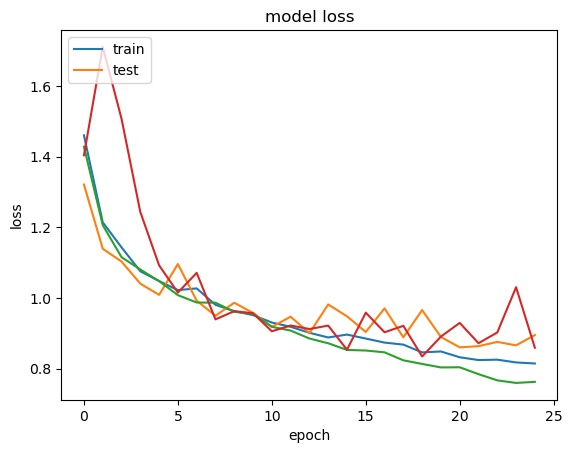

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [76]:
preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)

168/168 [==============================] - 1s 8ms/step


In [77]:
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)

In [87]:
finaldf[6:15]

,actualvalues,predictedvalues
6,neutral,neutral
7,surprise,surprise
8,happy,neutral
9,sad,sad
10,neutral,neutral
11,angry,sad
12,angry,angry
13,neutral,neutral
14,sad,sad


In [82]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.6419246549794853


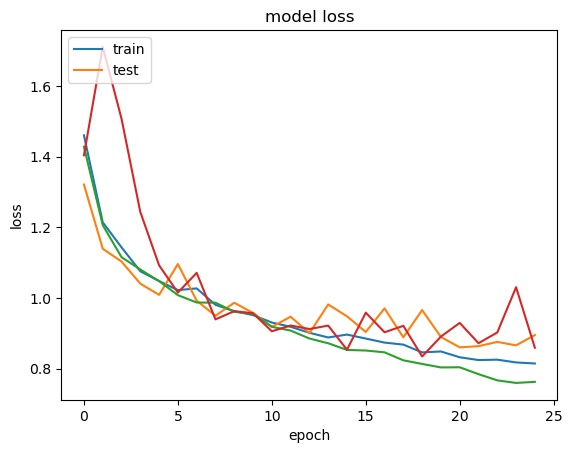

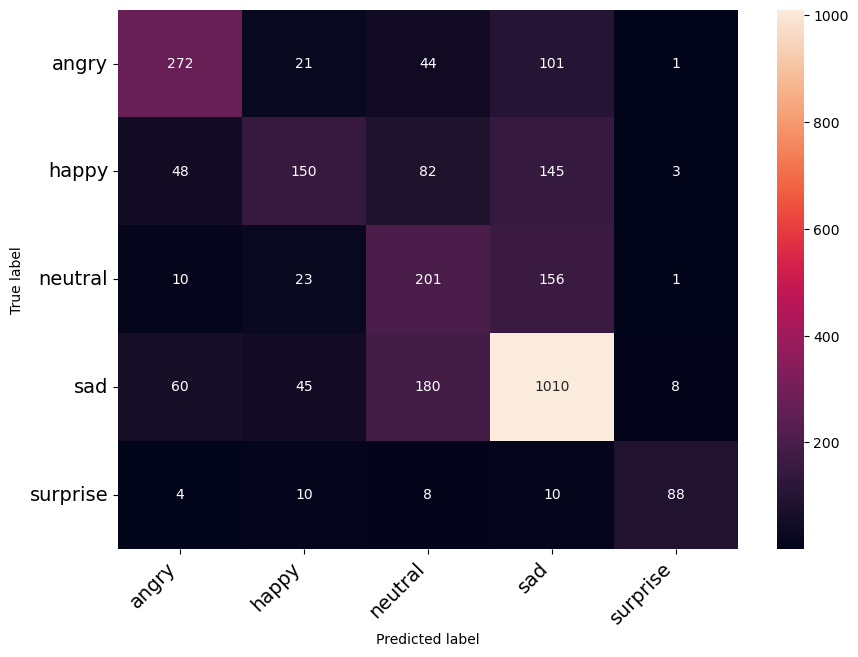

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [83]:
from sklearn.metrics import accuracy_score
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [43]:
model.save("emotion_detechor.h5")